In [1]:
import os
import shutil
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from glob import glob
import cv2
from tqdm.auto import tqdm
import joblib

from skimage.morphology import skeletonize


def get_skeletonizeimage(path, output_dir):
    new_path = path.split('/')[-1][5:][:-4]
    im = cv2.imread(path, 0)
    im = skeletonize(im>100).astype(np.uint8) * 255
    cv2.imwrite(os.path.join(OUTPUT_DIR, ('skeleton_'+new_path+'.png')), im)

In [2]:
BASE_DIR = '../'
IMAGE_DIR = os.path.join(BASE_DIR, 'data/interm/non-treated-dataset')
OUTPUT_DIR = os.path.join(BASE_DIR, 'data/interm/skeleton-non-treated-dataset')

image_paths = glob(os.path.join(IMAGE_DIR, 'vein*'))

image_results = joblib.Parallel(n_jobs=-1)(
    joblib.delayed(get_skeletonizeimage)(path, OUTPUT_DIR) for path in tqdm(image_paths)
)

  0%|          | 0/1 [00:00<?, ?it/s]

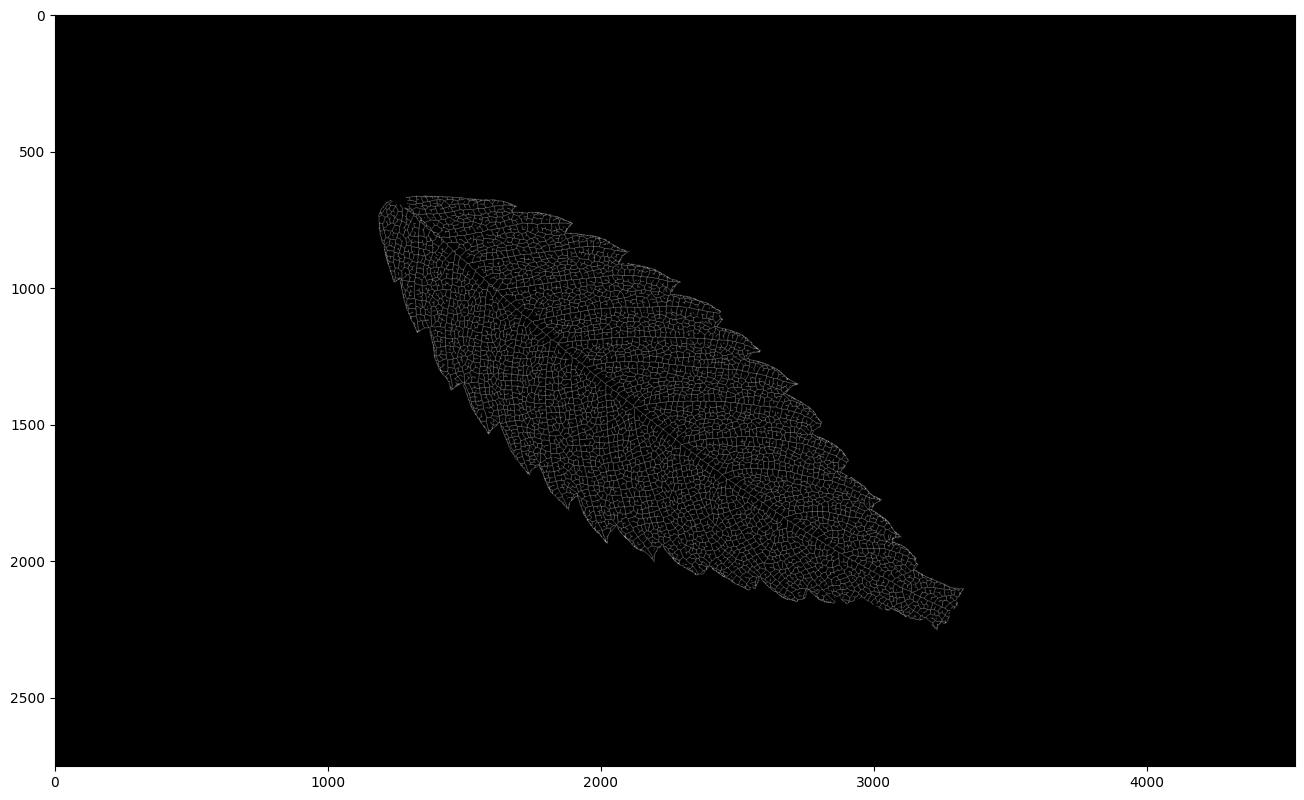

In [3]:
path = '../data/interm/skeleton-non-treated-dataset/skeleton_Zelkova_serrata_0.png'
im = cv2.imread(path, 0)

plt.figure(figsize=(16, 12))
plt.imshow(im, cmap='gray')
plt.show()